**Phase 2:**

Now you have had time to explore and get used to the dataset, use the data to answer some interesting questions. It is time to restart your analysis of the data in the attept to build a predictive model. Feel free to use what you learned in phase 1, for example, if you learned that some variables are highly correlated to the output that you want to predict, you want to make sure to keep them into your analysis. Please perform the following steps:

**Introduction: (5 pt)**

Formulate your research question so that you focus on predicting an outcome from the data (i.e prediction of Microcardial Infraction). It can be that your questions in Phase 1 have helped you to determine where to focus during phase 2, or you focus on all the data this time (not on a subset)

**Data preparation: (10 pt)**

Load the dataset in the same way as in Phase 1.
Copy the link and load it as we do in our practicals. (5 pt)
Select rows and columns relevant to your research question. (5 pt)

**Explore and clean the data by: (30 pt)**

Identify, report and correct issues with missing data (if any). (10 pt)
Identify, report and correct issues with erroneous data (if any). (10 pt)
Identify and correct outliers (if any). Explain your reasoning. (10 pt)

**Describe and visualize: (25 pt)**

Provide a summary of your cohort, this is a description of the final clean data. Make use of a table with descriptive statistics (i.e. means, medians, standard deviations) of important variables such as age, gender, outcome ect. Where possible, use visualisations. (10pt)
Make the report interactive: Create at least one interactive visualisation using input from the user. (10pt)
Turn your interactive report into an application using GitHub, Voila and Binder.** (5pt)

**Data analysis: (25 pt)**

Perform feature engineering on the data to better apply AI models to them (5pt)
After splitting the data in a way that you can at a minimum test and train, apply several prediction models to your data. (10pt)
Use performance metrics to determine the best model (5 pt)
Apply further hyper-parameter tuning, or cross validation if possible. (5 pt)

**Conclusion: (5 pt)**

Summarize the work and the main findings related to the initial research question. (5 pt)

RQ2 - In adults in the Framingham Heart Study (P), how well do baseline cardiovascular risk factors, including sex (I), predict incident cardiovascular events and all-cause mortality over 24 years (O, T), and does predictive performance or estimated risk differ between men and women (C)?
- Outcomes measured: Myocardial infarction, CVD, Stroke, Death



In [68]:
import pandas as pd
import numpy as np

In [69]:
# First import data file
CVD = pd.read_csv('https://raw.githubusercontent.com/LUCE-Blockchain/Databases-for-teaching/refs/heads/main/Framingham%20Dataset.csv')
CVD.head()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
1,2448,1,209.0,52,121.0,66.0,0,0.0,NaN,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
3,6238,2,260.0,52,105.0,69.5,0,0.0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
4,6238,2,237.0,58,108.0,66.0,0,0.0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


Key outcomes: Myocardial infarction, Stroke, CVD, Death

Aims:
1. describe gender differences in risk factors
2. build predictive models for selected outcomes

# Subset

In [70]:
unique_periods = CVD['PERIOD'].unique()
print(unique_periods)

[1 3 2]


In [71]:
cvd_by_period = {}
for period in unique_periods:
    cvd_by_period[period] = CVD[CVD['PERIOD'] == period]

print("DataFrames split by 'PERIOD' column:")
for period, df in cvd_by_period.items():
    print(f"nPeriod {period} DataFrame (first 5 rows):")
    print(df.head())

DataFrames split by 'PERIOD' column:
nPeriod 1 DataFrame (first 5 rows):
   RANDID  SEX  TOTCHOL  AGE  SYSBP  DIABP  CURSMOKE  CIGPDAY    BMI  \
0    2448    1    195.0   39  106.0   70.0         0      0.0  26.97   
2    6238    2    250.0   46  121.0   81.0         0      0.0  28.73   
5    9428    1    245.0   48  127.5   80.0         1     20.0  25.34   
7   10552    2    225.0   61  150.0   95.0         1     30.0  28.58   
9   11252    2    285.0   46  130.0   84.0         1     23.0  23.10   

   DIABETES  ...  CVD  HYPERTEN  TIMEAP  TIMEMI  TIMEMIFC  TIMECHD  TIMESTRK  \
0         0  ...    1         0    8766    6438      6438     6438      8766   
2         0  ...    0         0    8766    8766      8766     8766      8766   
5         0  ...    0         0    8766    8766      8766     8766      8766   
7         0  ...    1         1    2956    2956      2956     2956      2089   
9         0  ...    0         1    8766    8766      8766     8766      8766   

   TIMECVD  T

#Select period 1 only

In [72]:
cvd_by_period[1].describe()

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
count,4.434000e+03,4434.000000,4382.000000,4434.000000,4434.000000,4434.000000,4434.000000,4402.000000,4415.000000,4434.000000,...,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000,4434.000000
mean,4.987278e+06,1.561570,236.984254,49.925801,132.907758,83.083559,0.491881,8.966379,25.846161,0.027289,...,0.260938,0.733424,6901.450609,7240.304917,7185.682454,6666.195986,7304.632386,6817.947903,7505.630356,3436.208841
std,2.903549e+06,0.496251,44.651098,8.676929,22.421597,12.055999,0.499990,11.931706,4.101821,0.162943,...,0.439196,0.442219,2749.242416,2483.433943,2530.986424,2878.820399,2388.337639,2804.315550,2213.961362,3451.645839
min,2.448000e+03,1.000000,107.000000,32.000000,83.500000,48.000000,0.000000,0.000000,15.540000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000
25%,2.440336e+06,1.000000,206.000000,42.000000,117.500000,75.000000,0.000000,0.000000,23.090000,0.000000,...,0.000000,0.000000,5348.000000,6224.500000,6058.000000,4767.250000,6344.750000,5145.250000,6974.250000,0.000000
50%,4.972848e+06,2.000000,234.000000,49.000000,129.000000,82.000000,0.000000,0.000000,25.450000,0.000000,...,0.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,2188.000000
75%,7.463577e+06,2.000000,264.000000,57.000000,144.000000,90.000000,1.000000,20.000000,28.090000,0.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,6934.000000
max,9.999312e+06,2.000000,696.000000,70.000000,295.000000,142.500000,1.000000,70.000000,56.800000,1.000000,...,1.000000,1.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000,8766.000000


In [73]:
cvd_by_period[1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4434 entries, 0 to 11624
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RANDID    4434 non-null   int64  
 1   SEX       4434 non-null   int64  
 2   TOTCHOL   4382 non-null   float64
 3   AGE       4434 non-null   int64  
 4   SYSBP     4434 non-null   float64
 5   DIABP     4434 non-null   float64
 6   CURSMOKE  4434 non-null   int64  
 7   CIGPDAY   4402 non-null   float64
 8   BMI       4415 non-null   float64
 9   DIABETES  4434 non-null   int64  
 10  BPMEDS    4373 non-null   float64
 11  HEARTRTE  4433 non-null   float64
 12  GLUCOSE   4037 non-null   float64
 13  educ      4321 non-null   float64
 14  PREVCHD   4434 non-null   int64  
 15  PREVAP    4434 non-null   int64  
 16  PREVMI    4434 non-null   int64  
 17  PREVSTRK  4434 non-null   int64  
 18  PREVHYP   4434 non-null   int64  
 19  TIME      4434 non-null   int64  
 20  PERIOD    4434 non-null   int64  


# Create risk profile df

In [74]:
selected_columns = [
    'AGE',
    'SEX',
    'CURSMOKE',
    'CIGPDAY',
    'BMI',
    'SYSBP',
    'DIABP',
    'HEARTRTE',
    'TOTCHOL',
    'DIABETES',
    'PREVHYP',
    'PREVCHD',
    'PREVAP',
    'PREVMI',
    'PREVSTRK',
    'BPMEDS'
]

risk_profile_df = cvd_by_period[1][selected_columns]
risk_profile_df = risk_profile_df.groupby('SEX')

print("Risk Profile grouped by Sex for Period 1:")
print(risk_profile_df.head().sort_values(by='SEX'))
print(risk_profile_df.describe())

Risk Profile grouped by Sex for Period 1:
    AGE  SEX  CURSMOKE  CIGPDAY    BMI  SYSBP  DIABP  HEARTRTE  TOTCHOL  \
0    39    1         0      0.0  26.97  106.0   70.0      80.0    195.0   
5    48    1         1     20.0  25.34  127.5   80.0      75.0    245.0   
20   52    1         0      0.0  26.36  141.5   89.0      76.0    260.0   
23   43    1         1     30.0  23.61  162.0  107.0      93.0    225.0   
30   46    1         1     15.0  26.31  142.0   94.0      98.0    294.0   
9    46    2         1     23.0  23.10  130.0   84.0      85.0    285.0   
7    61    2         1     30.0  28.58  150.0   95.0      65.0    225.0   
2    46    2         0      0.0  28.73  121.0   81.0      95.0    250.0   
15   63    2         0      0.0  33.11  138.0   71.0      60.0    205.0   
12   43    2         0      0.0  30.30  180.0  110.0      77.0    228.0   

    DIABETES  PREVHYP  PREVCHD  PREVAP  PREVMI  PREVSTRK  BPMEDS  
0          0        0        0       0       0         0     0.0 

In [75]:
risk_profile_df.head()

,AGE,SEX,CURSMOKE,CIGPDAY,BMI,SYSBP,DIABP,HEARTRTE,TOTCHOL,DIABETES,PREVHYP,PREVCHD,PREVAP,PREVMI,PREVSTRK,BPMEDS
0,39,1,0,0.0,26.97,106.0,70.0,80.0,195.0,0,0,0,0,0,0,0.0
2,46,2,0,0.0,28.73,121.0,81.0,95.0,250.0,0,0,0,0,0,0,0.0
5,48,1,1,20.0,25.34,127.5,80.0,75.0,245.0,0,0,0,0,0,0,0.0
7,61,2,1,30.0,28.58,150.0,95.0,65.0,225.0,0,1,0,0,0,0,0.0
9,46,2,1,23.0,23.10,130.0,84.0,85.0,285.0,0,0,0,0,0,0,0.0
12,43,2,0,0.0,30.30,180.0,110.0,77.0,228.0,0,1,0,0,0,0,0.0
15,63,2,0,0.0,33.11,138.0,71.0,60.0,205.0,0,0,0,0,0,0,0.0
20,52,1,0,0.0,26.36,141.5,89.0,76.0,260.0,0,1,0,0,0,0,0.0
23,43,1,1,30.0,23.61,162.0,107.0,93.0,225.0,0,1,0,0,0,0,0.0
30,46,1,1,15.0,26.31,142.0,94.0,98.0,294.0,0,1,0,0,0,0,0.0


### Reshaping Descriptive Statistics for Risk Profile
- AI generated code

In [76]:
# Get the descriptive statistics, which is already grouped by 'SEX'
desc_stats = risk_profile_df.describe()

# Transpose the DataFrame
# This will make the original multi-index columns (e.g., (AGE, mean)) into rows
# and the original index (SEX) into columns.
desc_stats_transposed = desc_stats.T

# Rename the columns for better readability (SEX 1 and SEX 2)
desc_stats_transposed.columns = [f'SEX_{col}' for col in desc_stats_transposed.columns]

# Reset the index to turn the multi-index (variable, statistic) into regular columns
desc_stats_final = desc_stats_transposed.reset_index()

# Rename the index levels for clarity
desc_stats_final.rename(columns={'level_0': 'Variable', 'level_1': 'Statistic'}, inplace=True)

print("Descriptive statistics reshaped (more rows, fewer columns):")
display(desc_stats_final)


Descriptive statistics reshaped (more rows, fewer columns):


,Variable,Statistic,SEX_1,SEX_2
0,AGE,count,1944.000000,2490.000000
1,AGE,mean,49.786523,50.034538
2,AGE,std,8.719935,8.643398
3,AGE,min,33.000000,32.000000
4,AGE,25%,42.000000,43.000000
...,...,...,...,...
115,BPMEDS,min,0.000000,0.000000
116,BPMEDS,25%,0.000000,0.000000
117,BPMEDS,50%,0.000000,0.000000
118,BPMEDS,75%,0.000000,0.000000


##Check consistency

In [77]:
import pandas as pd

def check_smoking_consistency(df):
    """
    Checks for inconsistencies where CURSMOKE is 0 but CIGPDAY is > 0.

    Args:
        df (pd.DataFrame): The input DataFrame containing 'CURSMOKE' and 'CIGPDAY' columns.

    Returns:
        pd.DataFrame: A DataFrame containing rows with inconsistencies.
    """

    inconsistent_data = df[(df['CURSMOKE'] == 0) & (df['CIGPDAY'] > 0)]

    return inconsistent_data

inconsistent_smoking_data = check_smoking_consistency(cvd_by_period[1])

if not inconsistent_smoking_data.empty:
    print("Found inconsistencies in smoking data (CURSMOKE=0 but CIGPDAY>0):")
    display(inconsistent_smoking_data[['CURSMOKE', 'CIGPDAY']].head())
    print(f"Total inconsistent records: {len(inconsistent_smoking_data)}")
else:
    print("No inconsistencies found where CURSMOKE=0 and CIGPDAY>0 in the data.")

No inconsistencies found where CURSMOKE=0 and CIGPDAY>0 in the data.


#Create outcomes df


In [78]:
# outcomes_df
selected_outcomes_columns = [
    'ANGINA',
    'HOSPMI',
    'STROKE',
    'ANYCHD',
    'HYPERTEN',
    'DEATH',
    'SEX'
]

# Create outcomes_df from cvd_by_period[1]
outcomes_df = cvd_by_period[1][selected_outcomes_columns]

# Group by SEX and display descriptive statistics
print("Outcomes Profile grouped by Sex for Period 1:")
print(outcomes_df.groupby('SEX').describe())

Outcomes Profile grouped by Sex for Period 1:
     ANGINA                                               HOSPMI            \
      count      mean       std  min  25%  50%  75%  max   count      mean   
SEX                                                                          
1    1944.0  0.197016  0.397847  0.0  0.0  0.0  0.0  1.0  1944.0  0.164609   
2    2490.0  0.137349  0.344285  0.0  0.0  0.0  0.0  1.0  2490.0  0.053815   

     ... HYPERTEN        DEATH                                               
     ...      75%  max   count      mean       std  min  25%  50%  75%  max  
SEX  ...                                                                     
1    ...      1.0  1.0  1944.0  0.433642  0.495705  0.0  0.0  0.0  1.0  1.0  
2    ...      1.0  1.0  2490.0  0.283936  0.450997  0.0  0.0  0.0  1.0  1.0  

[2 rows x 48 columns]


###Check event counts

In [79]:
outcome_columns = [
    'ANGINA',
    'HOSPMI',
    'STROKE',
    'ANYCHD',
    'HYPERTEN',
    'DEATH']

for period, df in cvd_by_period.items():
    print(f"Outcome Counts for Period {period}:")
    for col in outcome_columns:
        if col in df.columns:
            # Calculate the number of events (sum of 1s) and total observations
            event_count = df[col].sum()
            total_observations = df[col].count()

            if total_observations > 0:
                event_percentage = (event_count / total_observations) * 100
                print(f"  {col}: {int(event_count)} events out of {total_observations} observations ({event_percentage:.2f}%)")
            else:
                print(f"  {col}: No observations.")
        else:
            print(f"  {col}: Column not found in Period {period} DataFrame.")

Outcome Counts for Period 1:
  ANGINA: 725 events out of 4434 observations (16.35%)
  HOSPMI: 454 events out of 4434 observations (10.24%)
  STROKE: 415 events out of 4434 observations (9.36%)
  ANYCHD: 1240 events out of 4434 observations (27.97%)
  HYPERTEN: 3252 events out of 4434 observations (73.34%)
  DEATH: 1550 events out of 4434 observations (34.96%)
Outcome Counts for Period 3:
  ANGINA: 528 events out of 3263 observations (16.18%)
  HOSPMI: 308 events out of 3263 observations (9.44%)
  STROKE: 283 events out of 3263 observations (8.67%)
  ANYCHD: 847 events out of 3263 observations (25.96%)
  HYPERTEN: 2454 events out of 3263 observations (75.21%)
  DEATH: 775 events out of 3263 observations (23.75%)
Outcome Counts for Period 2:
  ANGINA: 649 events out of 3930 observations (16.51%)
  HOSPMI: 392 events out of 3930 observations (9.97%)
  STROKE: 363 events out of 3930 observations (9.24%)
  ANYCHD: 1071 events out of 3930 observations (27.25%)
  HYPERTEN: 2936 events out of 

#Missingness

In [80]:
# count
risk_profile_df = cvd_by_period[1][selected_columns]
missing_counts = risk_profile_df.isnull().sum()

# percentage
missing_percentages = (risk_profile_df.isnull().sum() / len(risk_profile_df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentages
})

missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Missing Values Information for Risk Profile DataFrame:")
display(missing_info)


Missing Values Information for Risk Profile DataFrame:


,Missing Count,Missing Percentage
BPMEDS,61,1.375733
TOTCHOL,52,1.172756
CIGPDAY,32,0.721696
BMI,19,0.428507
HEARTRTE,1,0.022553


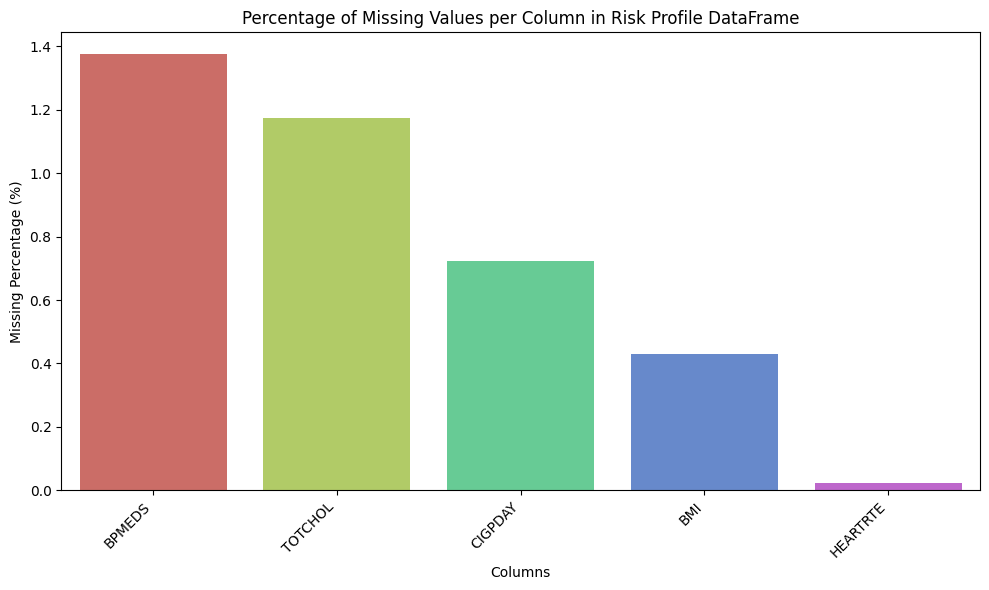

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

if not missing_info.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_info.index, y='Missing Percentage', data=missing_info, palette='hls', hue = missing_info.index, legend = False)
    plt.title('Percentage of Missing Values per Column in Risk Profile DataFrame')
    plt.xlabel('Columns')
    plt.ylabel('Missing Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values to display in the risk profile dataframe.")


In [82]:
# count
missing_counts_outcomes = outcomes_df.isnull().sum()

# percentage
missing_percentages_outcomes = (outcomes_df.isnull().sum() / len(outcomes_df)) * 100

missing_info_outcomes = pd.DataFrame({
    'Missing Count': missing_counts_outcomes,
    'Missing Percentage': missing_percentages_outcomes
})

missing_info_outcomes = missing_info_outcomes[missing_info_outcomes['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Missing Values Information for Outcomes DataFrame:")
display(missing_info_outcomes)

Missing Values Information for Outcomes DataFrame:


,Missing Count,Missing Percentage


## Handling missing values
- variables with missings had <5%, so we drop them

In [49]:
columns_for_dropna_check = selected_columns # These are the columns to check for NaNs
columns_to_extract = selected_columns + ['RANDID'] # These are the columns we need from cvd_by_period[1]

temp_df_for_dropna = cvd_by_period[1][columns_to_extract].copy()

initial_rows = len(temp_df_for_dropna)
print(f"Initial number of rows: {initial_rows}")

dropped_df = temp_df_for_dropna.dropna(subset=columns_for_dropna_check)

final_rows = len(dropped_df)
rows_dropped = initial_rows - final_rows

print(f"Number of rows after dropping missing values: {final_rows}")
print(f"Total rows dropped: {rows_dropped}")

kept_randids = dropped_df['RANDID'].unique()

cvd_by_period[1] = cvd_by_period[1][cvd_by_period[1]['RANDID'].isin(kept_randids)].copy()

print("\nUpdated 'cvd_by_period[1]' DataFrame after dropping rows with missing values in risk profile columns.")
print(f"New number of rows in cvd_by_period[1]: {len(cvd_by_period[1])}")

# Verify that there are no more missing values in the selected risk profile columns within cvd_by_period[1]
print("\nMissing values in selected risk profile columns after dropping (should be all 0s):")
display(cvd_by_period[1][selected_columns].isnull().sum())


Initial number of rows: 4434
Number of rows after dropping missing values: 4272
Total rows dropped: 162

Updated 'cvd_by_period[1]' DataFrame after dropping rows with missing values in risk profile columns.
New number of rows in cvd_by_period[1]: 4272

Missing values in selected risk profile columns after dropping (should be all 0s):


,0
AGE,0
SEX,0
CURSMOKE,0
CIGPDAY,0
BMI,0
SYSBP,0
DIABP,0
HEARTRTE,0
TOTCHOL,0
DIABETES,0


# Inspecting variables for distribution & outliers

Plotting distributions for selected risk profile columns:


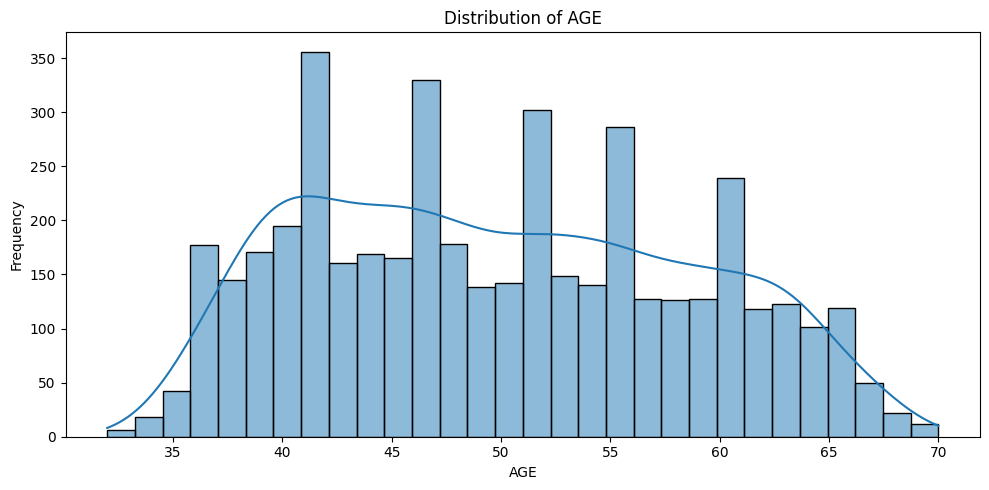

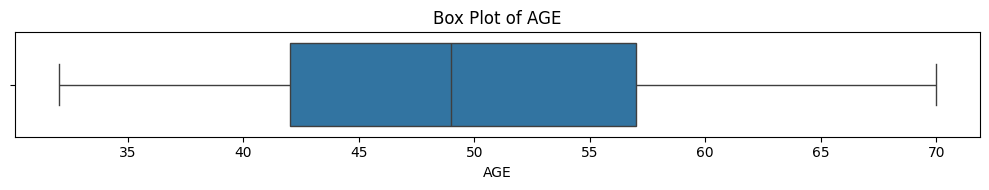

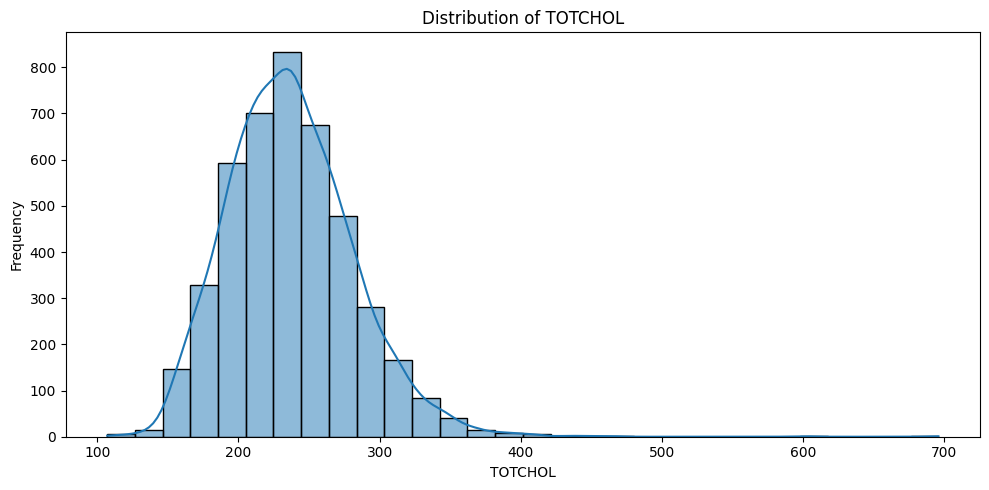

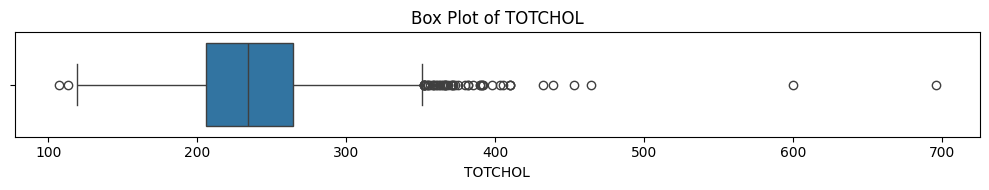

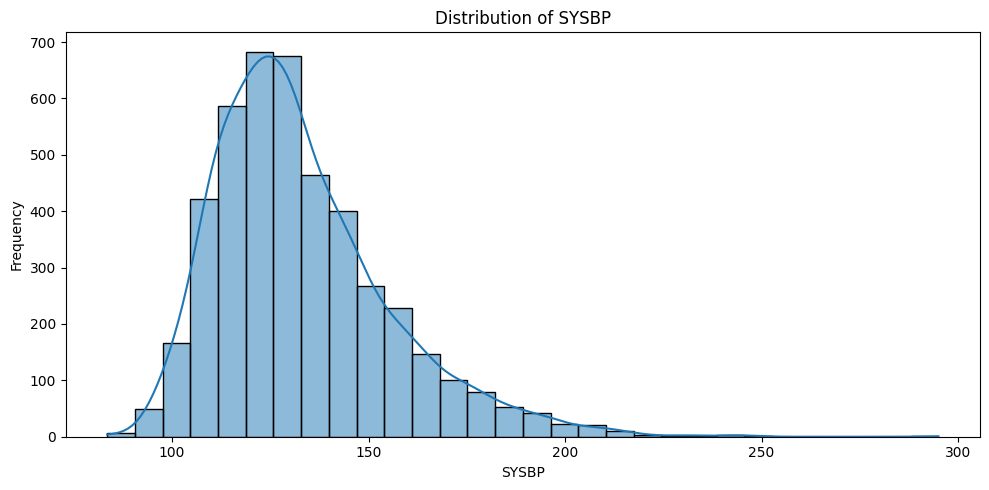

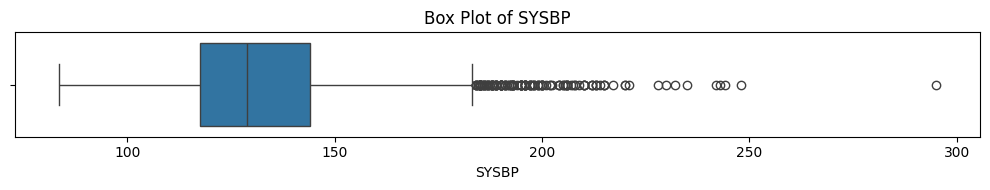

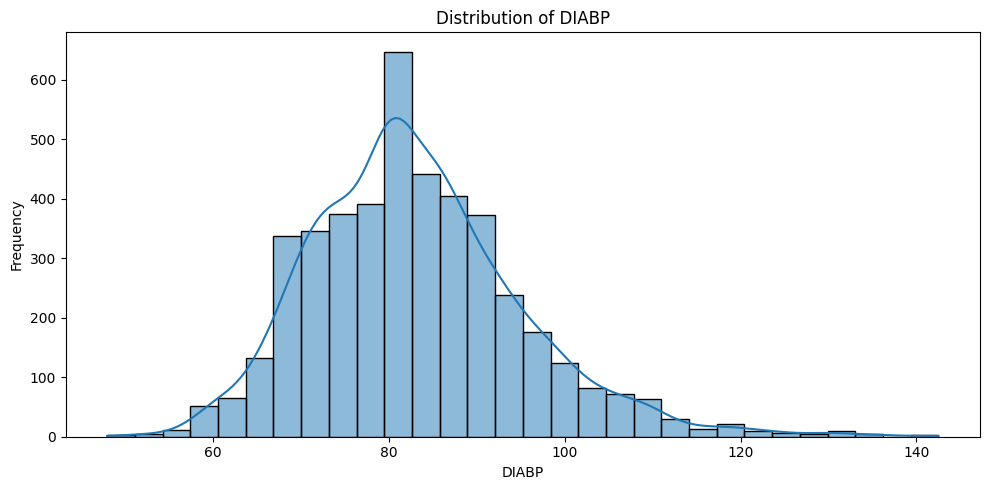

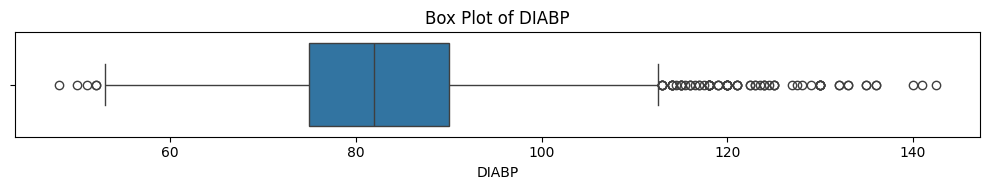

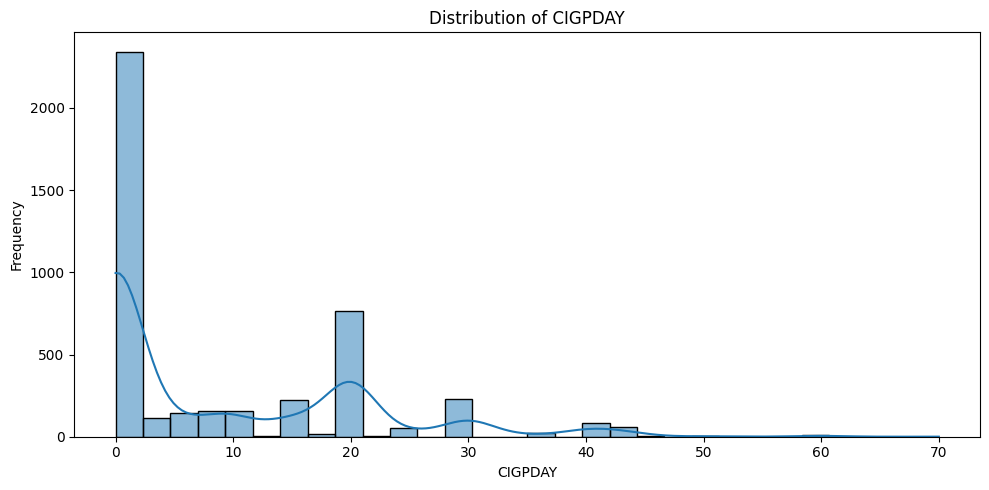

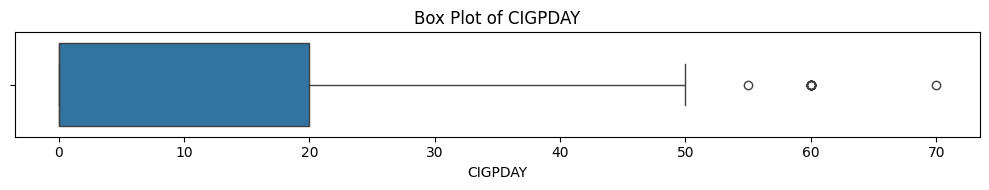

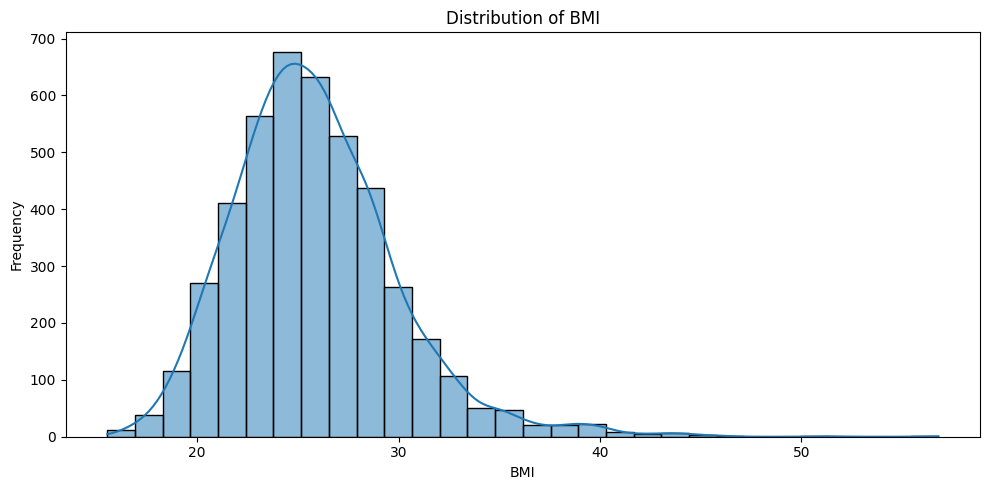

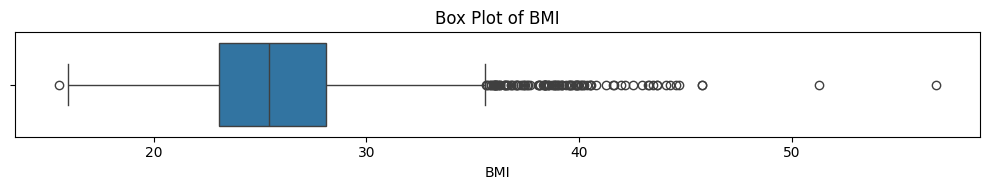

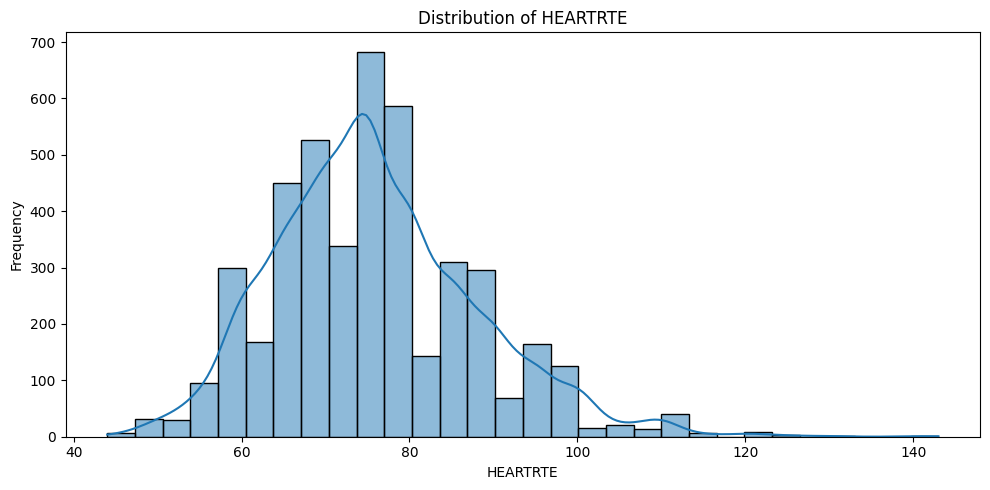

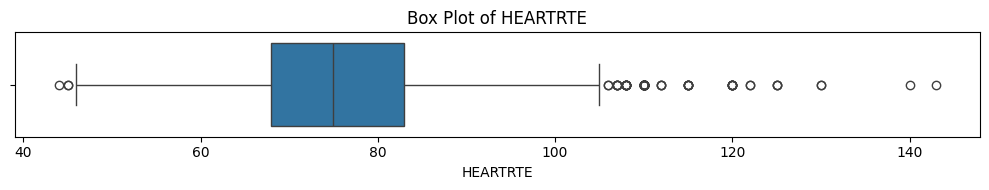

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Plotting distributions for selected risk profile columns:")

numerical_cols_for_dist = [
    'AGE',
    'TOTCHOL',
    'SYSBP',
    'DIABP',
    'CIGPDAY',
    'BMI',
    'HEARTRTE'
]

for col in numerical_cols_for_dist:
    plt.figure(figsize=(10, 5))
    # Histogram:
    sns.histplot(data=risk_profile_df, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Boxplots
    plt.figure(figsize=(10, 2))
    sns.boxplot(data=risk_profile_df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

NB: CIGPDAY: Spike @ 20 - Brainstorm reasons + document

Physiological limits:
- Age: 18-110
- Cigpday: <80
- BMI: 10-70
- SYSBP: 60-300
- DIASBP: 30-150
- HR: 30 - (220- 32)
- TOTCHOL: 70–600

### Applying Physiological Limits (Winsorization)

In [51]:
df_period1 = cvd_by_period[1].copy() # Work on a copy

physiological_limits = {
    'AGE': {'min': 18, 'max': 110},
    'CIGPDAY': {'min': 0, 'max': 80},
    'BMI': {'min': 10, 'max': 70},
    'SYSBP': {'min': 60, 'max': 300},
    'DIABP': {'min': 30, 'max': 150},
    'HEARTRTE': {'min': 30, 'max': 188}, # Calculated as 220 - 32
    'TOTCHOL': {'min': 70, 'max': 600}
}

for col, limits in physiological_limits.items():
    if col in df_period1.columns:
        original_min = df_period1[col].min()
        original_max = df_period1[col].max()

        # Winsorize lower bound
        df_period1[col] = df_period1[col].clip(lower=limits['min'])
        # Winsorize upper bound
        df_period1[col] = df_period1[col].clip(upper=limits['max'])

        winsorized_min = df_period1[col].min()
        winsorized_max = df_period1[col].max()

        print(f"  Column '{col}':")
        print(f"    Original Min/Max: ({original_min:.2f}, {original_max:.2f})")
        print(f"    Applied Limits: ({limits['min']}, {limits['max']})")
        print(f"    Winsorized Min/Max: ({winsorized_min:.2f}, {winsorized_max:.2f})")

cvd_by_period[1] = df_period1

print("\nDescriptive statistics for affected columns after winsorization:")
display(cvd_by_period[1][list(physiological_limits.keys())].describe())

  Column 'AGE':
    Original Min/Max: (32.00, 70.00)
    Applied Limits: (18, 110)
    Winsorized Min/Max: (32.00, 70.00)
  Column 'CIGPDAY':
    Original Min/Max: (0.00, 70.00)
    Applied Limits: (0, 80)
    Winsorized Min/Max: (0.00, 70.00)
  Column 'BMI':
    Original Min/Max: (15.54, 56.80)
    Applied Limits: (10, 70)
    Winsorized Min/Max: (15.54, 56.80)
  Column 'SYSBP':
    Original Min/Max: (83.50, 295.00)
    Applied Limits: (60, 300)
    Winsorized Min/Max: (83.50, 295.00)
  Column 'DIABP':
    Original Min/Max: (48.00, 142.50)
    Applied Limits: (30, 150)
    Winsorized Min/Max: (48.00, 142.50)
  Column 'HEARTRTE':
    Original Min/Max: (44.00, 143.00)
    Applied Limits: (30, 188)
    Winsorized Min/Max: (44.00, 143.00)
  Column 'TOTCHOL':
    Original Min/Max: (113.00, 696.00)
    Applied Limits: (70, 600)
    Winsorized Min/Max: (113.00, 600.00)

Descriptive statistics for affected columns after winsorization:


,AGE,CIGPDAY,BMI,SYSBP,DIABP,HEARTRTE,TOTCHOL
count,4272.000000,4272.000000,4272.000000,4272.000000,4272.000000,4272.000000,4272.000000
mean,49.847612,8.959036,25.841419,132.777505,83.070342,75.855805,236.933755
std,8.657236,11.929138,4.094619,22.264537,11.970199,12.141802,44.347456
min,32.000000,0.000000,15.540000,83.500000,48.000000,44.000000,113.000000
25%,42.000000,0.000000,23.087500,117.000000,75.000000,68.000000,206.000000
50%,49.000000,0.000000,25.450000,129.000000,82.000000,75.000000,234.000000
75%,57.000000,20.000000,28.082500,144.000000,90.000000,83.000000,264.000000
max,70.000000,70.000000,56.800000,295.000000,142.500000,143.000000,600.000000


Next steps: boxplots,
missings,
exclusion strategy,


 Filter observations:
For incident outcomes, exclude those with prevalent disease (e.g. PREVMI=1 if predicting new MI).
Optionally limit to first exam (PERIOD = 1) for consistent baseline.

3. Data Cleaning and Quality Control (30 pts)

Missing data
 Identify missing values per variable.
Decide on strategy:
Impute (mean/median for continuous, mode for categorical) or
Drop if small proportion.
-  Document which variables were imputed and how.

Erroneous data:
Check variable ranges against data dictionary (e.g. SYSBP 83.5–295).
Flag impossible or implausible values (e.g. negative, zero for BMI).
Correct or remove those rows; explain reasoning.

Outliers:
Plot distributions (boxplots/histograms) for key continuous variables.
Apply IQR rule or z-score threshold (>3 SD) to flag extreme outliers.
 Decide whether to cap (winsorize) or remove.
 Explain justification in notebook text.


# Task
Create six separate DataFrames for specific incident outcomes from, excluding participants with prevalent conditions for each outcome, and store them in a dictionary called incident_outcome_dfs. Each DataFrame will include RANDID, selected risk factors, and the respective incident outcome variable. The outcomes to create are: incident Myocardial Infarction or Fatal CHD, incident Stroke, incident Any CHD, incident CVD, incident Angina, and all-cause Mortality.